In [1]:
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import pylab
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = pd.read_excel("FB_data.xlsx", index_col=0)
df = data
df



,type,video,image,time,impressions,hashtags,emojis,text_clear,harrypotter,gaming,...,comments,other_clicks,image_view,link_clicks,video_play,text_sentiment,readability,chars,lottery,adv
ID,,,,,,,,,,,,,,,,,,,,,
1,Photo,0,1,2020-06-19 23:32:00,105655,0,0,Der 20. Juni markiert den Beginn des Ringkrieg...,0,0,...,118,4935,682,0,0,0.00000,69,305,0,0
2,Photo,0,1,2020-06-20 03:44:00,71400,0,0,Neue Runde Falsche Zitate raten: Was haben Ric...,0,0,...,334,3873,372,0,0,0.00000,72,89,0,0
3,Photo,0,1,2020-06-20 07:30:00,51903,1,0,Zeit ein bisschen Verrücktheit in deinen Kleid...,0,0,...,8,378,144,139,0,0.00000,70,117,0,1
4,Photo,0,1,2020-06-20 10:02:00,66841,0,0,Die Drittklässler in Hogwarts dürfen aus unter...,0,0,...,78,1271,271,0,0,-0.43935,50,331,0,0
5,Photo,0,1,2020-06-20 23:32:00,88444,0,0,Wie sähe das Duell Darth Maul vs. Captain Amer...,0,0,...,48,1782,11881,74,0,0.00000,71,327,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,Photo,0,1,2021-05-29 08:01:00,39467,0,0,Geile Poster-Designs können wir uns den ganzen...,0,0,...,0,88,174,15,0,0.00000,69,172,0,0
1222,Status,0,0,2021-05-29 23:03:00,72401,0,0,Frage zum Sonntag: Welches Buch empfehlt ihr a...,0,0,...,321,4150,0,0,0,0.00000,68,66,0,0
1223,Photo,0,1,2021-05-30 03:12:00,25594,0,0,RAUM27 kommt aufs Elbenwald Festival! Das Duo ...,0,0,...,0,82,4,21,0,0.24345,79,378,0,0


In [6]:
# lock at dependend variable/s


ID
1       1372
2        174
3         78
4        185
5        433
        ... 
1221     112
1222      59
1223      13
1224      41
1225     161
Name: likes, Length: 1181, dtype: int64

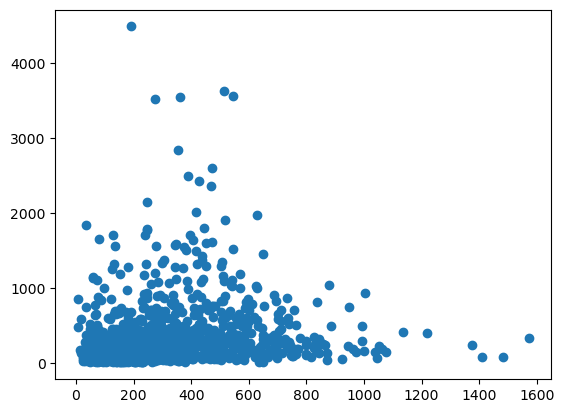

In [8]:
# View the relationship between an independent and a dependent variable in the data points

# You can't really see a connection in this graphic yet

<Axes: ylabel='Frequency'>

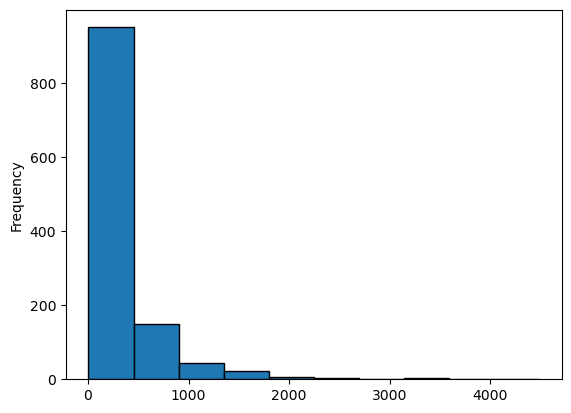

In [3]:
# Next, let's look at the distribution of our dependent variable.

# The distribution is skewed to the right

In [8]:
# A transformation is recommended so that the distribution is closer to a normal distribution.
# we need to calculate for likes+1 (because if likes = 0 then it wont work)
likes_log = []
df['likes_ln'] = np.log(df['likes']+1)
df

,type,video,image,time,impressions,hashtags,emojis,text_clear,harrypotter,gaming,...,other_clicks,image_view,link_clicks,video_play,text_sentiment,readability,chars,lottery,adv,likes_ln
ID,,,,,,,,,,,,,,,,,,,,,
1,Photo,0,1,2020-06-19 23:32:00,105655,0,0,Der 20. Juni markiert den Beginn des Ringkrieg...,0,0,...,4935,682,0,0,0.00000,69,305,0,0,7.224753
2,Photo,0,1,2020-06-20 03:44:00,71400,0,0,Neue Runde Falsche Zitate raten: Was haben Ric...,0,0,...,3873,372,0,0,0.00000,72,89,0,0,5.164786
3,Photo,0,1,2020-06-20 07:30:00,51903,1,0,Zeit ein bisschen Verrücktheit in deinen Kleid...,0,0,...,378,144,139,0,0.00000,70,117,0,1,4.369448
4,Photo,0,1,2020-06-20 10:02:00,66841,0,0,Die Drittklässler in Hogwarts dürfen aus unter...,0,0,...,1271,271,0,0,-0.43935,50,331,0,0,5.225747
5,Photo,0,1,2020-06-20 23:32:00,88444,0,0,Wie sähe das Duell Darth Maul vs. Captain Amer...,0,0,...,1782,11881,74,0,0.00000,71,327,0,0,6.073045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,Photo,0,1,2021-05-29 08:01:00,39467,0,0,Geile Poster-Designs können wir uns den ganzen...,0,0,...,88,174,15,0,0.00000,69,172,0,0,4.727388
1222,Status,0,0,2021-05-29 23:03:00,72401,0,0,Frage zum Sonntag: Welches Buch empfehlt ihr a...,0,0,...,4150,0,0,0,0.00000,68,66,0,0,4.094345
1223,Photo,0,1,2021-05-30 03:12:00,25594,0,0,RAUM27 kommt aufs Elbenwald Festival! Das Duo ...,0,0,...,82,4,21,0,0.24345,79,378,0,0,2.639057


<Axes: ylabel='Frequency'>

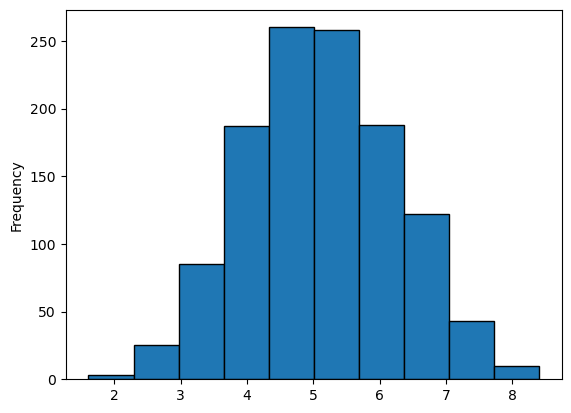

In [6]:
# That already looks like a normal distribution


In [9]:
# Shapiro-Wilk-Test

# p-value is greater than 0.05, so we can probably assume a normal distribution.
# The normal distribution of the dependent variable is not necessarily a prerequisite for a regression, 
# but it allows us to interpret the results better.

Shapiro-Wilk-Test:
P-Value: 0.08643615990877151


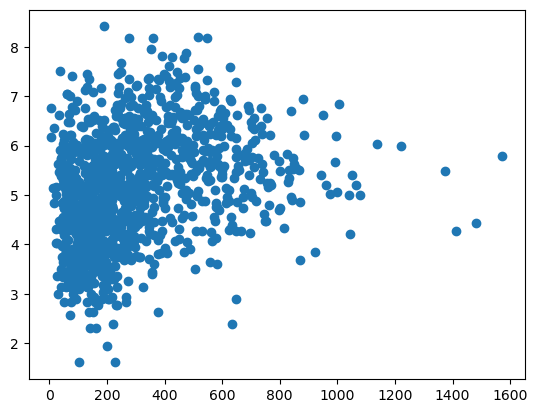

In [18]:
# Now let's check the connection between characters and likes (likes_ln) again

# Now we can assume a connection. What connection do you see?

0.0

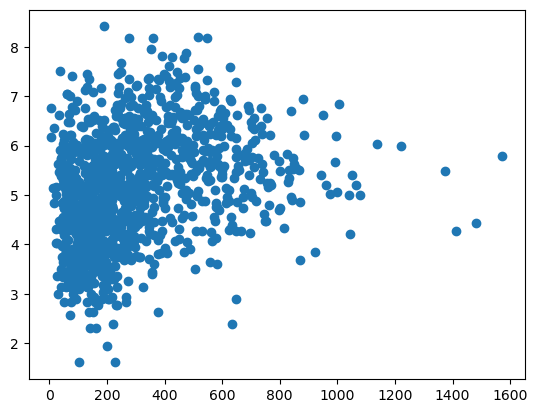

In [10]:
# --> we want to discover the relationshipt with regression analysis
ind_variables = ["chars", "adv"]
x = df[ind_variables]
y = df["likes_ln]

#adding constant 

#OLS model



SyntaxError: unterminated string literal (detected at line 4) (594557564.py, line 4)

In [13]:
# Shapiro-Wilk-Test

# Normal distribution of the residuals is assumed

Shapiro-Wilk-Test: Statistik=0.9977319240570068, P-Wert=0.10196064412593842


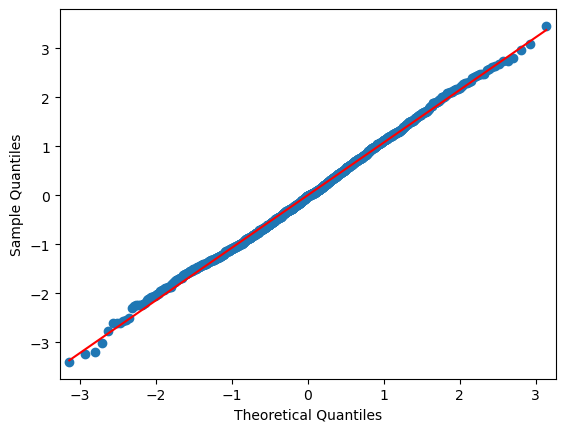

In [15]:
# QQ-Plot 


In [23]:
# What happens if we add another variable?
# We could add the "control variable" product


#adding constant 

#OLS model


# We can see that this has a strong effect.
# Our R square has improved compared to the 1st model.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               likes_ln   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     67.92
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.21e-28
Time:                        17:43:04   Log-Likelihood:                -1751.4
No. Observations:                1181   AIC:                             3509.
Df Residuals:                    1178   BIC:                             3524.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7942      0.061     78.873      0.000       4.675       4.913
chars          0.0014      0.000      9.273      0.000       0.001       0.002
adv           -0.3037      0.073     -4.148      0.000      -0.447      -0.160
==============================================================================
Omnibus:                        3.204   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.992
Skew:                           0.070   Prob(JB):                        0.224
Kurtosis:                       2.797   Cond. No.                         991.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Let's compare the R² values of the models

# Model 1


# Model 2


# List of all independent variables


# Create the comparison table


# Add the R² for each model


                  Model1      Model2
R_squared       0.090295    0.103388
Used_Variables     chars  chars, adv


In [ ]:
# Your task: find a better model for this data set explaining likes_ln! 
# Set up a table to compare several models with each other. 

In [9]:
# are there any problems in the model? Calculate VIF
# We check whether there is multicollinearity. 
# This would mean that our results may be biased because several variables explain the same thing.
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif
# results for the variables should be below 10, otherwise high correlation
# If a value is above 10, it correlates with another variable.


NameError: name 'x' is not defined

In [ ]:
# We can use a correlation matrix to check which variables correlate strongly.


In [47]:
# My proposed model




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               likes_ln   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     246.3
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          1.03e-203
Time:                        18:35:50   Log-Likelihood:                -1334.7
No. Observations:                1181   AIC:                             2683.
Df Residuals:                    1174   BIC:                             2719.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.3262      0.074     45.130      0.000       3.182       3.471
chars           0.0026      0.000      9.546      0.000       0.002       0.003
chars_sq    -2.004e-06   2.66e-07     -7.549      0.000   -2.53e-06   -1.48e-06
adv            -0.2848      0.053     -5.395      0.000      -0.388      -0.181
video          -0.1379      0.053     -2.597      0.010      -0.242      -0.034
lottery        -0.4268      0.114     -3.744      0.000      -0.650      -0.203
impressions  2.134e-05    6.7e-07     31.833      0.000       2e-05    2.27e-05
==============================================================================
Omnibus:                        3.196   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.247
Skew:                          -0.125   Prob(JB):                        0.197
Kurtosis:                       2.941   Cond. No.                     1.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# we see that there is an inverted u-shape effect between text length and engagement. Calculate optimum


643.9310747278093

In [56]:
# Likes for characters in the optimum


234.24642332748675

In [59]:
# Likes for actual characters 

# mean value chars data set


183.41990660929838

In [5]:
# Relative increase in likes

#p


NameError: name 'ylikes_opt' is not defined

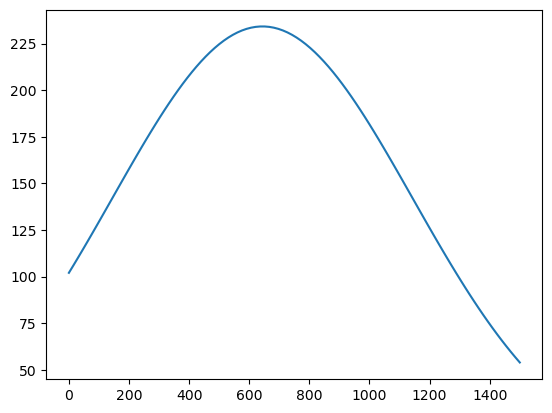

In [67]:
# Visualize the relationship


In [73]:
# t-test


# mean value comparison


# t-Test


# Output


T-Statistik: -10.132186577732616
P-Wert: 3.4293601101238686e-23
191.06666666666666
332.27251732101615
